## Without Scikit Learn



In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

###### Data Preparation

y = mx + b

y = 2x - 3

In [2]:
def datamaker(N,err):
    x = np.linspace(-1,1,N)

    y = 2*x - 3

    y = y + err*np.random.randn(N)

    return x,y 

In [3]:
X_train, y_train = datamaker(500,0.5)

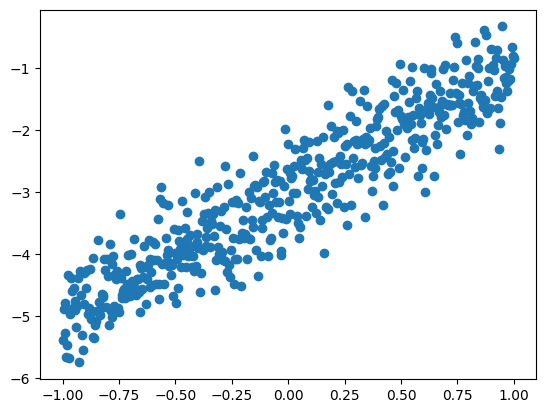

In [4]:
plt.scatter(X_train,y_train)

In [5]:
w_actual = 2

b_actual = -3

In [6]:
df = pd.DataFrame({"X_train":X_train,"y_train":y_train})



In [7]:
df

,X_train,y_train
0,-1.000000,-5.395101
1,-0.995992,-4.884363
2,-0.991984,-5.281668
3,-0.987976,-4.788968
4,-0.983968,-5.665243
...,...,...
495,0.983968,-1.171004
496,0.987976,-0.935046
497,0.991984,-0.665603
498,0.995992,-0.804887


In [9]:
X = X_train

In [10]:
y = y_train

In [12]:
X = X.reshape(500,1)

In [14]:
y = y.reshape(500,1)

In [15]:
X.shape 

(500, 1)

In [16]:
def costfunc(w,b,X,y):

    Z = np.dot(X,w) + b 

    ### Shape of X = 500,1
    ### Wshape = 1*1
    ## b shape = 1*1

    ## Z shape = 500*1 
    ### y shape = 500*1 

    loss = (y-Z)**2

    m = len(Z)

    j = ((1/m)*np.sum(loss))

    return j 

Formulas:


## 1. $ J(w,b) = \frac {1}{m} \sum [y - (W.X + b)]^2 $
## 2. $ \frac {\partial J}{\partial W} = \frac {-2}{m} (X^T . [y - (W.X + b)]) $
## 3. $ \frac {\partial J} {\partial b} = \frac {-2}{m} \sum [ y - (W.X + b) ] $

In [17]:
def gradient(w,b,X,y):

    Z = np.dot(X,w) +b 

    J = costfunc(w,b,X,y)

    m = X.shape[0]

    dw = (-2/m)*np.dot(X.T,(y-Z))

    db = (-2/m)*np.sum(y-Z)

    return dw,db 

In [18]:
## training 

## initialize random weights

w = np.random.randint(0,10)
b = np.random.randint(0,10)

print(w,b)



3 7


In [19]:
print(costfunc(w,b,X,y))

100.5091904079547


In [20]:
y_pred = w*X+b

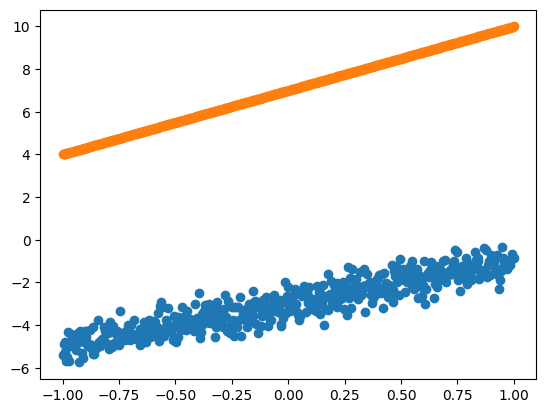

In [21]:
plt.scatter(X,y)
plt.scatter(X,y_pred)

In [24]:
## Lets make our machine learn

def learning(w,b,X,y,iteration):

    Z = np.dot(X,w) + b

    costs = []

    costs.append(costfunc(w,b,X,y))

    for e in range(iteration):
        print(f"=====================epoch {e} out of {iteration}")
        dw,db = gradient(w,b,X,y)

        w = w - 0.005*dw 
        b = b - 0.005*db 

        costs.append(costfunc(w,b,X,y))

    wf = w
    bf = b

    return wf,bf,costs 

In [25]:
wf,bf,costs = learning(w,b,X,y,1000)

=====================epoch 0 out of 1000
=====================epoch 1 out of 1000
=====================epoch 2 out of 1000
=====================epoch 3 out of 1000
=====================epoch 4 out of 1000
=====================epoch 5 out of 1000
=====================epoch 6 out of 1000
=====================epoch 7 out of 1000
=====================epoch 8 out of 1000
=====================epoch 9 out of 1000
=====================epoch 10 out of 1000
=====================epoch 11 out of 1000
=====================epoch 12 out of 1000
=====================epoch 13 out of 1000
=====================epoch 14 out of 1000
=====================epoch 15 out of 1000
=====================epoch 16 out of 1000
=====================epoch 17 out of 1000
=====================epoch 18 out of 1000
=====================epoch 19 out of 1000
=====================epoch 20 out of 1000
=====================epoch 21 out of 1000
=====================epoch 22 out of 1000
=====================epoch 23 out of 1000
==

In [26]:
wf 

array([[2.04443732]])

In [27]:
bf 

np.float64(-2.9977955984335636)

In [28]:
w_actual

2

In [29]:
b_actual

-3

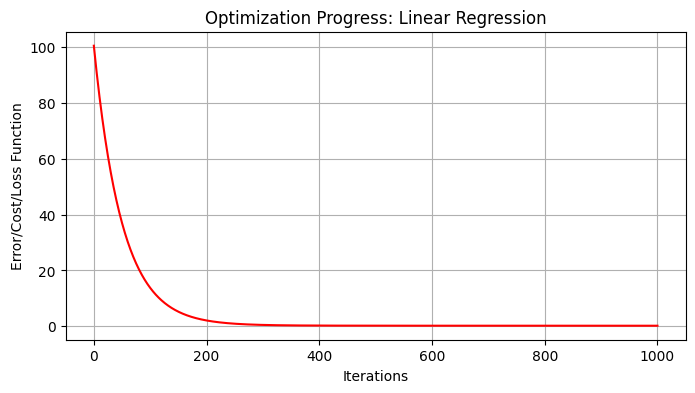

In [30]:
plt.figure(figsize=(8,4))
plt.plot(costs,c="red")
plt.xlabel("Iterations")
plt.ylabel("Error/Cost/Loss Function")
plt.title("Optimization Progress: Linear Regression")

plt.grid()

In [31]:
Actual = ["w = 2", "b = -3"]
ModelResults = [f"w = {wf[0][0]}", f"b = {bf}"]

In [32]:
results = pd.DataFrame({'Actual Parameters':Actual , 'Model-Parameters':ModelResults})

In [33]:
results

,Actual Parameters,Model-Parameters
0,w = 2,w = 2.0444373247925087
1,b = -3,b = -2.9977955984335636


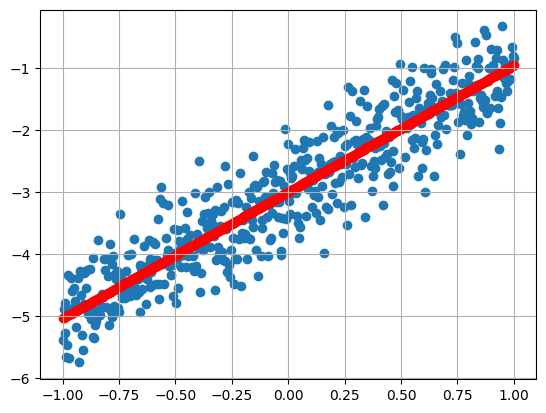

In [36]:
plt.scatter(X_train,y_train)
plt.scatter(X_train, wf[0][0]*X_train +bf,c = 'red')
plt.grid()

In [37]:
## making predictions

xpred = float(input("Enter the value for which you want predictions: "))
ypred = wf[0][0]*xpred + bf 

yact = 2*xpred - 3

print("y_predicted is: "+ str(ypred) + '. Y_actual is: '+ str(yact))

y_predicted is: 7.224391025528979. Y_actual is: 7.0


## By scikit learn 

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
model = LinearRegression()

In [41]:
model.fit(X,y)

LinearRegression()

In [42]:
model.coef_

array([[2.00977598]])

In [43]:
model.intercept_

array([-2.99822723])

In [47]:
Actual = ["w = 2", "b = -3"]
ModelResults_wo_sk = [f"w = {wf[0][0]}", f"b = {bf}"]
ModelResults_w_sk = [f"w = {model.coef_[0][0]}", f"b = {model.intercept_[0]}"]

In [48]:
results = pd.DataFrame({'Actual Parameters':Actual , 'Model-Parameters wo SK':ModelResults_wo_sk,
                        "Model-Parameters w SK": ModelResults_w_sk})

In [49]:
results

,Actual Parameters,Model-Parameters wo SK,Model-Parameters w SK
0,w = 2,w = 2.0444373247925087,w = 2.0097759790654397
1,b = -3,b = -2.9977955984335636,b = -2.9982272343751672


Text(0.5, 1.0, 'Training Performance')

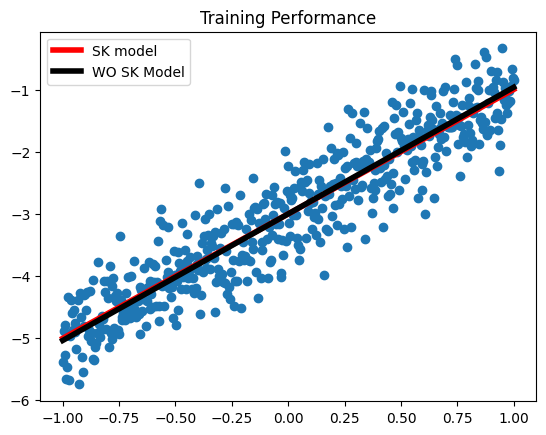

In [58]:
plt.style.use('default')

plt.scatter(X_train,y_train)
plt.plot(X_train , model.predict(X) , c='r', lw=4,label = "SK model")
plt.plot(X_train,wf[0][0]*X_train+bf,c="black",lw=4,label = "WO SK Model")

plt.legend()
plt.title('Training Performance')